# Introduction to Python Pandas

In [7]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
## Changes the style of plots
plt.style.use('ggplot')

## Changes the way big numbers are presented:
pd.options.display.float_format = '{:20,.2f}'.format

## Working with CSV files

In [133]:
## Reading the file specifying the separator
df_countries = pd.read_csv("../datasets/Gapminder.csv", sep=";")

## First look into the dataframe 
df_countries.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [134]:
## Changing the name of the columns
translation = dict( country="pais", continent="continente", 
                    year="ano", lifeExp="expectativa_de_vida", 
                    pop="populacao_total", gdpPercap="pib_per_capita")

df_countries.rename(columns = translation, inplace = True)

## Verifying the result
df_countries.head()

,pais,continente,ano,expectativa_de_vida,populacao_total,pib_per_capita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
## Size of the dataset
print(f"\nThe dataset has {df_countries.shape[0]} rows and {df_countries.shape[1]} columns.\n")


The dataset has 3312 rows and 6 columns.



In [135]:
## Reading the name of the columns
print("\nThe columns of the dataset (after the renaming) are:\n")
for column in df_countries.columns:
    print('\t > ' + column)


The columns of the dataset (after the renaming) are:

	 > pais
	 > continente
	 > ano
	 > expectativa_de_vida
	 > populacao_total
	 > pib_per_capita


In [136]:
## Data types of each column:
df_countries.dtypes

pais                    object
continente              object
ano                      int64
expectativa_de_vida    float64
populacao_total          int64
pib_per_capita         float64
dtype: object

In [137]:
## Extracting some statistics from dataset
df_countries.describe()

,ano,expectativa_de_vida,populacao_total,pib_per_capita
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165877
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [138]:
## Showing the unique values of the "continente" column
print('Continents:')
for continent in df_countries.continente.unique():
    print(f"\t > {continent}")

Continents:
	 > Asia
	 > Europe
	 > Africa
	 > Americas
	 > nan
	 > FSU
	 > Oceania


In [139]:
## Making a dataset with only the Oceania 
oceania = df_countries.loc[df_countries.continente == 'Oceania']
oceania.sample(10)

,pais,continente,ano,expectativa_de_vida,populacao_total,pib_per_capita
2142,New Zealand,Oceania,1987,74.320,3317166,19007.191290
2129,New Zealand,Oceania,1974,72.000,3058400,17439.200310
2697,Solomon Islands,Oceania,1992,58.270,358713,2109.894257
2107,New Zealand,Oceania,1952,69.390,1994794,10556.575660
976,Fiji,Oceania,1967,58.607,485000,2170.073285
2695,Solomon Islands,Oceania,1982,58.736,250516,1467.396037
2113,New Zealand,Oceania,1958,70.890,2281533,12437.618420
2159,New Zealand,Oceania,2007,80.204,4115771,25185.009110
2148,New Zealand,Oceania,1993,76.620,3475061,19337.190900
2123,New Zealand,Oceania,1968,71.180,2759000,14279.122890


In [141]:
df_countries.groupby('continente')['pais'].nunique()

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: pais, dtype: int64

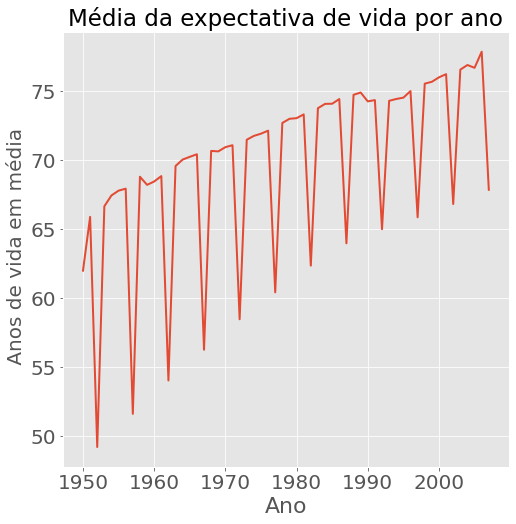

In [142]:
plt.figure(figsize=(8,8))
df_countries.groupby('ano')['expectativa_de_vida'].mean().plot(fontsize=20, linewidth=2)
plt.title('Média da expectativa de vida por ano', fontsize=23)
plt.xlabel('Ano', fontsize=22)
plt.ylabel(' Anos de vida em média', fontsize=20);

In [143]:
def life_expenctancy_by_continent(continent:str)-> pd.core.series.Series:
    return df_countries.loc[df_countries['continente'] == continent].groupby('ano')['expectativa_de_vida'].mean()

In [144]:
life_africa = life_expenctancy_by_continent('Africa')
life_americas = life_expenctancy_by_continent('Americas')
life_asia = life_expenctancy_by_continent('Asia')
life_europe = life_expenctancy_by_continent('Europe')
life_oceania = life_expenctancy_by_continent('Oceania')

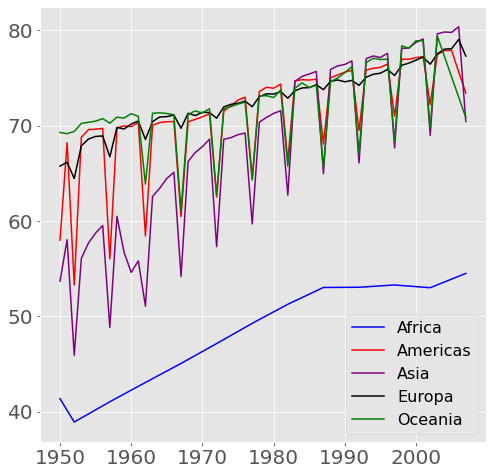

In [145]:
plt.figure(figsize=(8,8))
plt.plot(life_africa, c='b', label='Africa')
plt.plot(life_americas, c='r', label='Americas')
plt.plot(life_asia, c='purple', label='Asia')
plt.plot(life_europe,c='k', label='Europa')
plt.plot(life_oceania, c='green', label='Oceania')
plt.legend(fontsize=16)
plt.tick_params(labelsize=20)

In [149]:
print('{:.2f}'.format(df_countries.pib_per_capita.mean()))

11317.12


## Working with Excel spreadsheets

In [79]:
# Loading the data
df_1 = pd.read_excel('../datasets/Aracaju.xlsx')
df_2 = pd.read_excel('../datasets/Fortaleza.xlsx')
df_3 = pd.read_excel('../datasets/Natal.xlsx')
df_4 = pd.read_excel('../datasets/Recife.xlsx')
df_5 = pd.read_excel('../datasets/Salvador.xlsx')

In [80]:
# First look at the datasets
print(df_1.head(), end='\n\n')
print(df_2.head(), end='\n\n')
print(df_3.head(), end='\n\n')
print(df_4.head(), end='\n\n')
print(df_5.head(), end='\n\n')

    Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8

      Cidade       Data  Vendas  LojaID  Qtde
0  Fortaleza 2019-01-01   45.27    1002     2
1  Fortaleza 2019-01-01  115.61    1002     3
2  Fortaleza 2019-02-10   35.33    1004     3
3  Fortaleza 2019-02-10   20.95    1004     6
4  Fortaleza 2019-01-01   14.25    1004     6

  Cidade       Data  Vendas  LojaID  Qtde
0  Natal 2018-08-27   606.0     853     2
1  Natal 2018-11-25   563.0     853     2
2  Natal 2019-03-11   308.0     852     3
3  Natal 2019-01-07   271.0     854     3
4  Natal 2019-03-09   699.0     853     3

   Cidade       Data  Vendas  LojaID  Qtde
0  Recife 2019-01-01  162.61     981     1
1  Recife 2019-01-01   11.44     983     1
2  Recife 2019-02-10   12.94     983     5
3  Recife 2019-02-10  160.54     

In [81]:
# Concatenation of the datasets into a single DataFrame
df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [82]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [83]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [84]:
# Sampling our DataFrame
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
177,Salvador,2019-01-02,41.19,1037,2
21,Recife,2019-01-01,164.74,983,1
10,Aracaju,2019-01-01,42.34,1522,6
60,Recife,2019-01-01,37.97,983,1
81,Recife,2019-01-01,36.52,982,8


In [85]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [86]:
# Changing the type of LojaID column
df.LojaID = df.LojaID.astype("object")

In [87]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### Tratando valores nulos

In [88]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Caso tivéssemos dados faltantes em Vendas, por exemplo,substituir tais valores usando o método `fillna()`:

* poderíamos pela média:
```python
df.Vendas.fillna(df.Vendas.mean(), inplace=True)
```

* substituir por zero:
```python
df.Vendas.fillna(0, inplace=True)
```

Também poderíamos "*dropar*" as linhas com dados faltantes usando o método `dropna()`:

* todas as linhas que tiverem ao menos um valor faltante:
```python
df.dropna(inplace=True)
```

* linhas que tiverem um campo específico faltante (por exemplo `Vendas`):
```python
df.dropna(subset=['Vendas'], inplace=True)
```

* linhas com todas as entradas faltantes:
```python
df.dropna(how='all', inplace=True)
```


### Criando colunas

In [89]:
df['Receita'] = df.Vendas.mul(df.Qtde)
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [90]:
## Another way to perform multiplication:
df["Receita2"] = df.Vendas * df.Qtde

In [91]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita2
0,Aracaju,2018-01-01,142.00,1520,1,142.00,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08,196.08


In [92]:
## Erasing (or "dropping") columns
df.drop('Receita2', axis=1, inplace=True)

### Getting familiar with the dataset

In [93]:
## Returns the three largest revenue
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [94]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [95]:
## Max. revenue
df.Receita.max()

3544.0

In [96]:
## Min. revenue
df.Receita.min()

3.34

In [97]:
df.Receita.mean()

387.4977404921702

In [98]:
df.groupby('Cidade').Receita.sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [99]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


### The `datetime` type

Most of the time, fields that hold time (day, month, year, etc.) information comes in a data type not suitable for analysis. It is common to get those fields as text or even as integers. Let's change the datatype of the column *"Data"* (that means "date" in portuguese) to these types to practice the datatype conversion.

In [100]:
## Original dataset
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


In [101]:
## Change to integer
df['Data'] = df.Data.astype('int64') 

In [102]:
## Verifying the changes
print(df.head(3),end='\n\n')
print(df.dtypes)

    Cidade                 Data  Vendas LojaID  Qtde  Receita
0  Aracaju  1514764800000000000  142.00   1520     1   142.00
1  Aracaju  1514764800000000000   14.21   1522     6    85.26
2  Aracaju  1514764800000000000   71.55   1520     1    71.55

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object


In [103]:
## Changing the type back to datetime:
df['Data'] = pd.to_datetime(df.Data)

In [104]:
print(df.head(3),end='\n\n')
print(df.dtypes)

    Cidade       Data  Vendas LojaID  Qtde  Receita
0  Aracaju 2018-01-01  142.00   1520     1   142.00
1  Aracaju 2018-01-01   14.21   1522     6    85.26
2  Aracaju 2018-01-01   71.55   1520     1    71.55

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object


In [105]:
df.groupby(df.Data.dt.year).sum()

,Vendas,Qtde,Receita
Data,,,
2018,31456.67,775,118176.53
2019,78158.28,2141,228246.45


In [106]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [107]:
df['Ano_Venda'] = df['Data'].dt.year

In [108]:
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018


In [109]:
df['Mes_Venda'], df['Dia_venda'] = df['Data'].dt.month, df['Data'].dt.day

In [110]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda
54,Recife,2019-01-01,23.43,982,7,164.01,2019,1,1
163,Natal,2019-01-02,17.66,1036,3,52.98,2019,1,2
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2
36,Recife,2019-01-01,146.62,983,6,879.72,2019,1,1
127,Recife,2019-03-02,39.56,982,8,316.48,2019,3,2


In [111]:
## Some common queries/operations with dates:
print('First date = ', df['Data'].min())
print('Last date = ', df['Data'].max(), end='\n\n')

df['Diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

First date =  2018-01-01 00:00:00
Last date =  2019-04-05 00:00:00



,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_dias
25,Fortaleza,2019-01-01,80.31,1004,4,321.24,2019,1,1,365 days
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,2019,1,1,365 days
56,Recife,2019-01-01,7.98,983,5,39.90,2019,1,1,365 days
199,Salvador,2019-01-02,153.87,1036,3,461.61,2019,1,2,366 days


In [112]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_dias
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019,1,1,365 days
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days
70,Salvador,2019-01-01,39.06,1034,3,117.18,2019,1,1,365 days
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days
167,Natal,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days


In [113]:
## Quarters of the year (trimestre)
df['Trimestre'] = df['Data'].dt.quarter

In [114]:
df.groupby(df.Trimestre).Receita.sum()

Trimestre
1    293494.98
2     29648.00
3     11658.00
4     11622.00
Name: Receita, dtype: float64

In [115]:
## Filter by date
vendas_marco_2019 = df.loc[(df.Data.dt.year == 2019) & (df.Data.dt.month == 3)]
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_venda,Diferenca_dias,Trimestre
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2,425 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1


### Data visualization

In [116]:
df.LojaID.value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

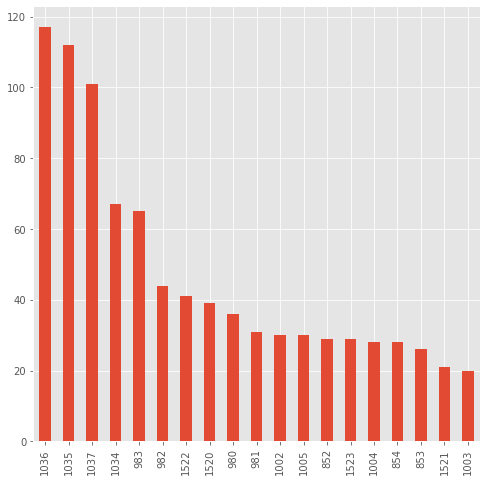

In [132]:
df.LojaID.value_counts(ascending=False).plot.bar(figsize=(8,8));

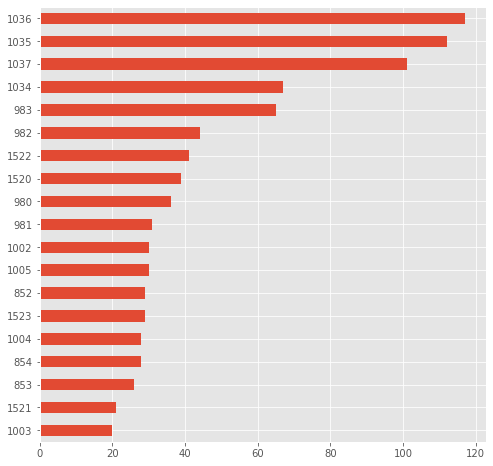

In [131]:
df.LojaID.value_counts(ascending=True).plot.barh(figsize=(8,8));

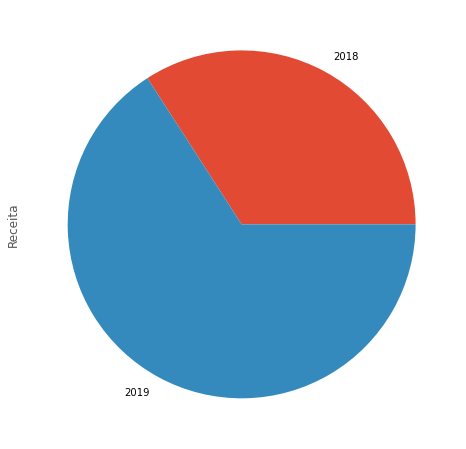

In [130]:
df.groupby(df.Data.dt.year).Receita.sum().plot.pie(figsize=(8,8));

Text(0, 0.5, 'Total de Vendas')

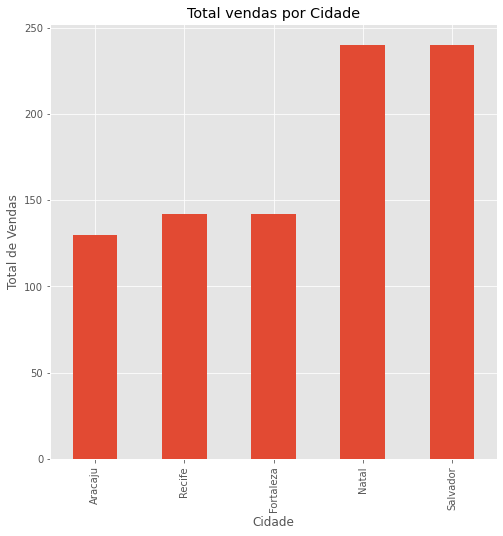

In [129]:
df.Cidade.value_counts(ascending=True).plot.bar(figsize=(8,8), title='Total vendas por Cidade');
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Text(0, 0.5, 'Total de Vendas')

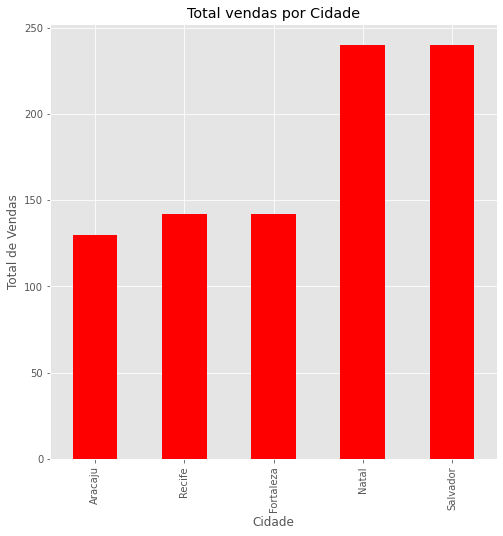

In [128]:
df.Cidade.value_counts(ascending=True).plot.bar(figsize=(8,8), title='Total vendas por Cidade', color='red');
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

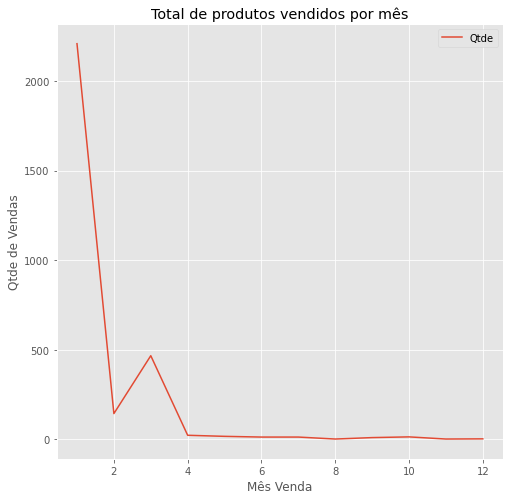

In [122]:
df.groupby(df.Mes_Venda).Qtde.sum().plot.line(figsize=(8,8), title='Total de produtos vendidos por mês');
plt.xlabel('Mês Venda')
plt.ylabel('Qtde de Vendas')
plt.legend();

In [123]:
df_2019 = df[df.Ano_Venda == 2019]

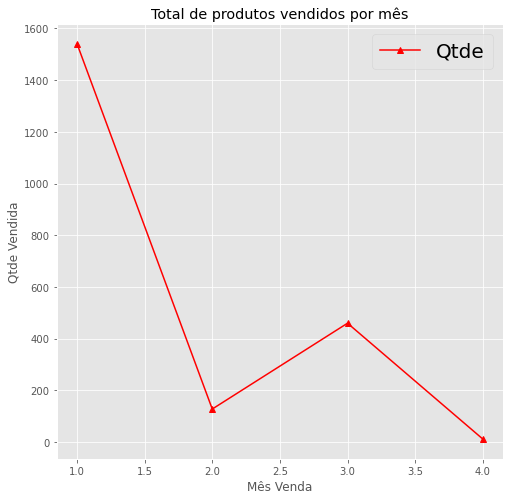

In [124]:
df_2019.groupby(df_2019.Mes_Venda).Qtde.sum().plot(marker='^', color='red', figsize=(8,8),
                                                   title='Total de produtos vendidos por mês');
plt.ylabel('Qtde Vendida')
plt.xlabel('Mês Venda')
plt.legend(fontsize=20);

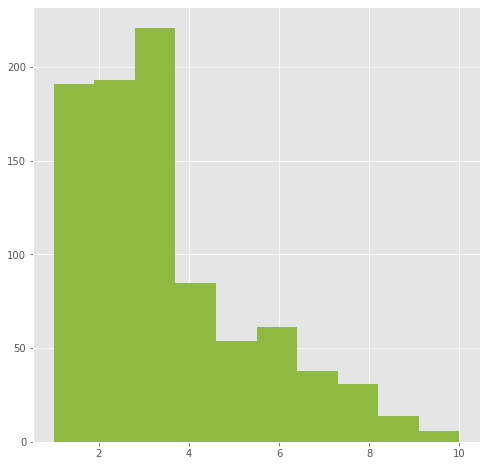

In [125]:
plt.figure(figsize=(8,8))
plt.hist(df.Qtde, color='C5');

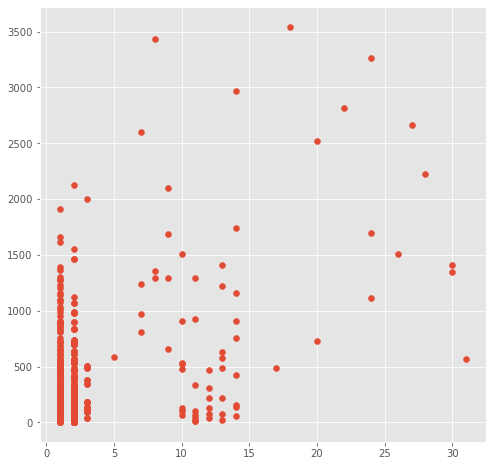

In [126]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_2019.Dia_venda, y=df_2019.Receita);

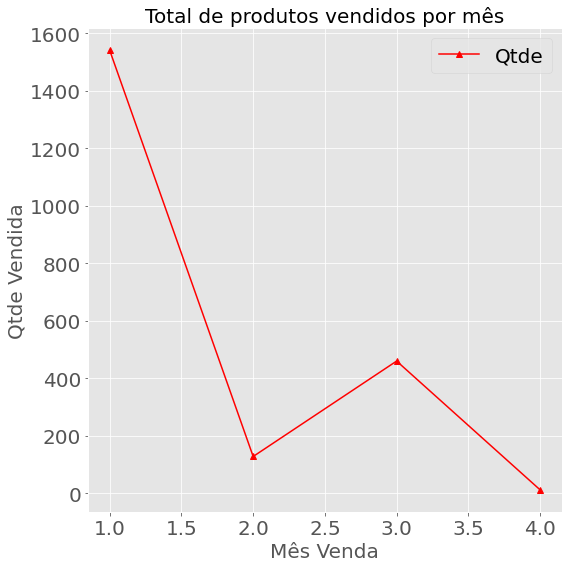

In [127]:
df_2019.groupby(df_2019.Mes_Venda).Qtde.sum().plot(marker='^', color='red', figsize=(8,8), fontsize=20);
plt.title('Total de produtos vendidos por mês', fontsize=20)
plt.ylabel('Qtde Vendida', fontsize=20)
plt.xlabel('Mês Venda', fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
# plt.savefig('quantidade_vendida_por_mes_2019.png'); # to save the figure uncomment this line